In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import pickle

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My Drive/ML Project/LES_RANS

/content/drive/My Drive/ML Project/LES_RANS


In [0]:
ls

'Copy of data_p_time_modelled.csv'    model_uy.json
'Copy of data_ux_time_modelled.csv'   model_uz.h5
'Copy of data_uy_time_modelled.csv'   model_uz.json
'Copy of data_uz_time_modelled.csv'   Random_Forest_LES_RANS.ipynb
 data_ux_time.csv                     RANS_sampling_30.csv
 LES_sampling_030.csv                 rf_ux_1.sav
 MLP_LES_RANS_p.ipynb                 rf_ux_2.sav
 MLP_LES_RANS_ux.ipynb                rf_ux_3.sav
 MLP_LES_RANS_uy.ipynb                rf_ux_4.sav
 MLP_LES_RANS_uz.ipynb                rf_ux_5.sav
 model.h5                             rf_ux_single_1.sav
 model.json                           rf_ux_single_2.sav
 model_p.h5                           rf_ux_single_3.sav
 model_p.json                         rf_ux_single_4.sav
 model_ux.h5                          rf_ux_single_5.sav
 model_ux.json                        SVR_LES_RANS.ipynb
 model_uy.h5                         'Visualize decision tree.ipynb'


In [0]:
# Read Features
X=pd.read_csv('RANS_sampling_30.csv')
X=X.drop(['V', 'U_0:0', 'U_0:1', 'U_0:2','Cell Type','nuTilda','cellID'], axis=1)

# Read dependent variable
#Y=pd.read_csv('Copy of data_ux_time_modelled.csv')
#Y=Y.drop(['cellID','value[0]','value[1]','value[2]','x1[n-1]'],axis=1)

Y=pd.read_csv('LES_sampling_030.csv')
Y=Y.drop(['V', 'U_0:0', 'U_0:1', 'U_0:2','Cell Type','cellID','ccz','ccx','ccy','nut','p','U:1','U:2',],axis=1)
#Y=np.mean(Y.iloc[:, 19:-1],axis=1)

In [0]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle= True, test_size=0.3,random_state=42)
#X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, shuffle= True, random_state=42)
# Scalling
scaler = preprocessing.StandardScaler().fit(X_train)
X_train =scaler.transform(X_train)
#X_val =scaler.transform(X_val)
X_test =scaler.transform(X_test)

#input_dim = X_train.shape[1]
#nb_y = y_train.shape[1]

In [0]:
score=np.empty([])
kf = KFold(n_splits=5, random_state=42, shuffle=True)
i=1
for train_index, val_index in kf.split(X_train):
  x_train, x_val = X_train[train_index], X_train[val_index]
  Y_train, Y_val = y_train.iloc[train_index], y_train.iloc[val_index]
  regr = RandomForestRegressor(max_depth=10, random_state=42,n_estimators=100,verbose=1,n_jobs=-1)
  regr.fit(x_train, Y_train)
  print('Train Accuracy',regr.score(x_train, Y_train))
  print('Test Accuracy',regr.score(x_val, Y_val))
  filename = 'rf_ux_single_{}.sav'.format(i)
  i+=1
  pickle.dump(regr, open(filename, 'wb'))
  print('Model Saved')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min


KeyboardInterrupt: ignored

In [22]:
# some time later...
# load the model from disk
filename = 'rf_ux_single_{}.sav'.format(5)
loaded_model = pickle.load(open(filename, 'rb'))
print('Model Loaded')
#print('Test Accuracy=',loaded_model.score(X_test,y_test))

Model Loaded


In [24]:
X=pd.read_csv('RANS_sampling_30.csv')
X=X.drop(['V', 'U_0:0', 'U_0:1', 'U_0:2','Cell Type','nuTilda'], axis=1)
#Y=pd.read_csv('Copy of data_ux_time_modelled.csv')
#Y=Y.drop(['cellID','value[0]','value[1]','value[2]','x1[n-1]'],axis=1)
Y=pd.read_csv('data_ux_time.csv')
#Y=Y.drop(['cellID'],axis=1)
Y['mean']=np.mean(Y.iloc[:, 19:-1],axis=1)
scaler_pred = preprocessing.StandardScaler().fit(X.drop(['cellID'],axis=1))
X_pred = scaler_pred.transform(X.drop(['cellID'],axis=1))
score=loaded_model.score(X_pred,Y['mean'])
print('Score: ',(score*100))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.3s


Score:  99.83526490479218


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.7s finished


In [25]:
Y_pred=np.asarray(loaded_model.predict(X_pred))
#Y_time_series=pd.DataFrame({'0':Y_pred[:,4],'1':Y_pred[:,2]})
#for i in range(2,50):
#  Y_time_series['{}'.format(i)]=Y_pred[:,0] + Y_pred[:,1]*Y_time_series['{}'.format(i-1)] + Y_pred[:,3]*Y_time_series['{}'.format(i-2)]
from sklearn.metrics import mean_squared_error
mean_squared_error(Y['mean'],Y_pred)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.6s finished


0.00042839955055226506

In [0]:
Y['ccz']=X['ccz']
#Making 2d plot
#at some z position 
X=X[X['ccz']==0.4158]
Y=Y[Y['ccz']==0.4158]

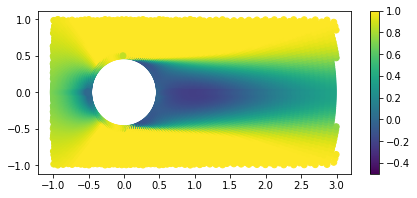

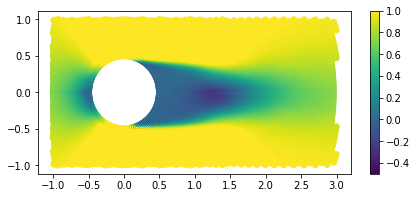

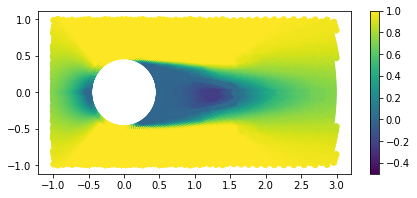

In [0]:
#Y_time_series
plt.rcParams["figure.figsize"] = [7,3]
plt.scatter(X['ccx'],X['ccy'],c=X['U:0'])
plt.colorbar()
plt.clim(-0.5, 1)
#plt.xlim(0,2.5)
#plt.ylim(0,1)
plt.show()
m,n=X.shape
plt.scatter(X['ccx'],X['ccy'],c=Y['mean'])
plt.colorbar()
plt.clim(-0.5, 1)
#plt.xlim(0,2.5)
#plt.ylim(0,1)
plt.show()
#plt.scatter(X['ccx'],X['ccy'],c=Y['x1[n-1]'].iloc[:m])
#plt.colorbar()
#plt.clim(-1.0, 1.5)
#plt.xlim(0,3)
#plt.ylim(0,1)
#plt.show()
plt.scatter(X['ccx'],X['ccy'],c=Y_pred[np.asarray(Y.index)])
plt.colorbar()
plt.clim(-0.5, 1)
#plt.xlim(0,2.5)
#plt.ylim(0,1)
plt.show()
#plt.scatter(X['ccx'],X['ccy'],c=Y_time_series['1'].iloc[:m])
#plt.colorbar()
#plt.clim(-1.0, 1.5)
#plt.xlim(0,3)
#plt.ylim(0,1)
#plt.show()

In [0]:
X

,cellID,nuTilda_0,ccz,nut,ccy,p,ccx,U:0,U:1,U:2
22164,39600,0.000013,0.4158,2.367100e-08,0.001939,-0.24826,0.50150,-0.000173,0.000881,-2.337100e-06
22165,39601,0.000064,0.4158,1.166000e-05,0.001951,-0.24833,0.50456,-0.004845,0.001258,-4.140500e-06
22166,39602,0.000136,0.4158,9.170700e-05,0.001963,-0.24856,0.50771,-0.009355,0.001245,-4.293700e-06
22167,39603,0.000223,0.4158,2.006200e-04,0.001976,-0.24890,0.51097,-0.013644,0.001202,-4.228800e-06
22168,39604,0.000322,0.4158,3.109600e-04,0.001989,-0.24928,0.51432,-0.018106,0.001154,-4.122200e-06
...,...,...,...,...,...,...,...,...,...,...
527167,1059295,0.000702,0.4158,6.997300e-04,-0.001989,0.61139,-0.51432,0.048076,-0.006861,5.890500e-07
527168,1059296,0.000488,0.4158,4.825600e-04,-0.001976,0.61336,-0.51097,0.036647,-0.006940,6.147600e-07
527169,1059297,0.000299,0.4158,2.861900e-04,-0.001963,0.61514,-0.50771,0.025637,-0.006993,6.385300e-07
527170,1059298,0.000142,0.4158,1.001700e-04,-0.001951,0.61657,-0.50456,0.015006,-0.006934,6.496200e-07
